In [49]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)


import math
from IPython.display import display, Math


In [47]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
        
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}
    
    settings = {
        "mult_bias_correction_order": 0,
        "smooth_scale_2D": 3,
        "smooth_scale_1D": 3,
        "boundary_correction_order": 0,
    }
    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]   
    sample_red = MCSamples(samples=np.array(data_so[int(len(data_so) * 0.3) : ]), names=names, labels=labels, settings=settings)
    print(len(data_so))
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        [sample_red],
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp_tjpc/number_counts_samples.txt
Removed no burn in
28400


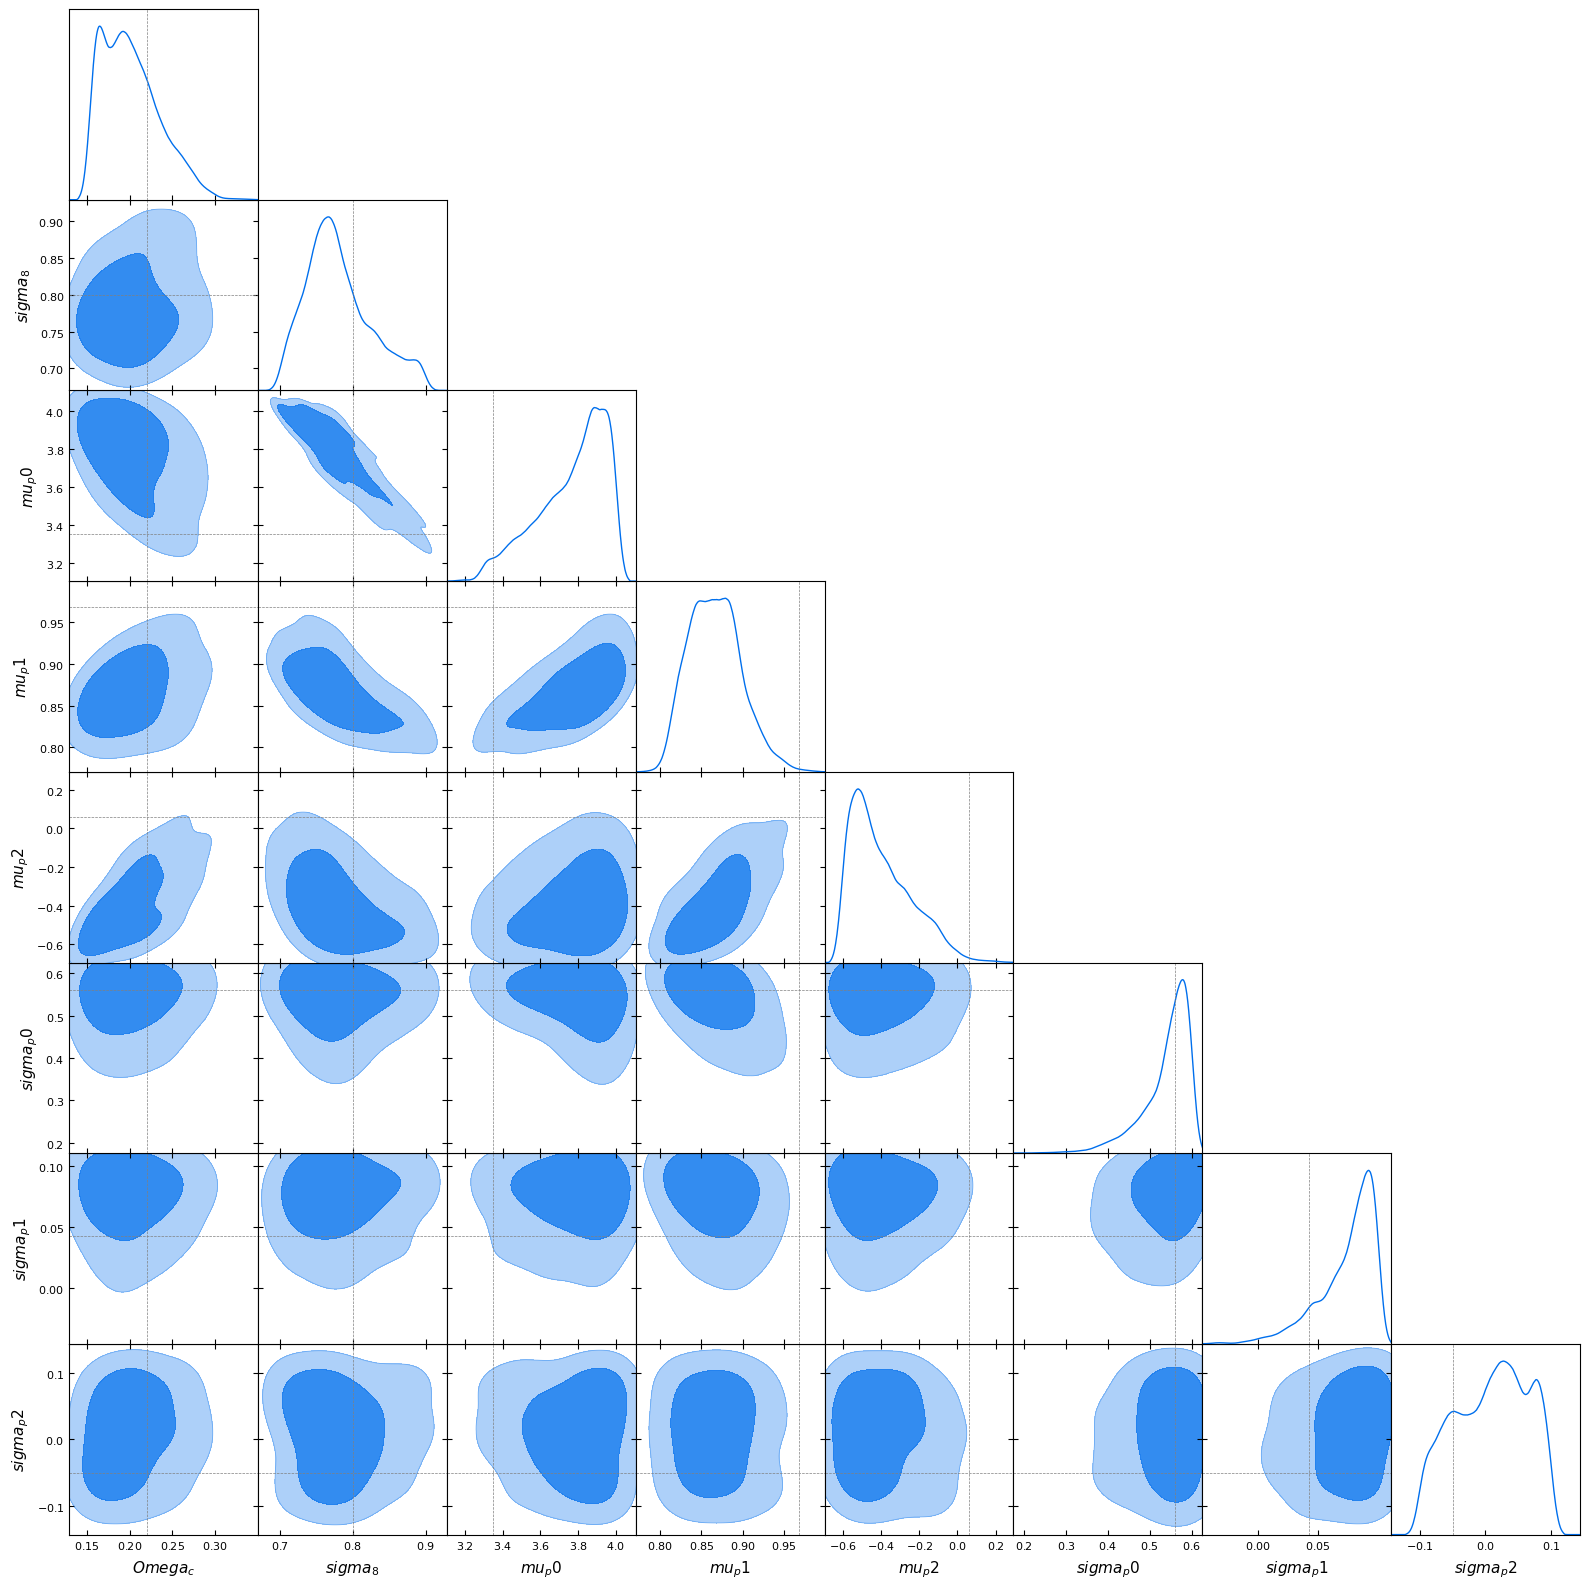

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp_tjpc/number_counts_samples.txt
Removed no burn in
15600


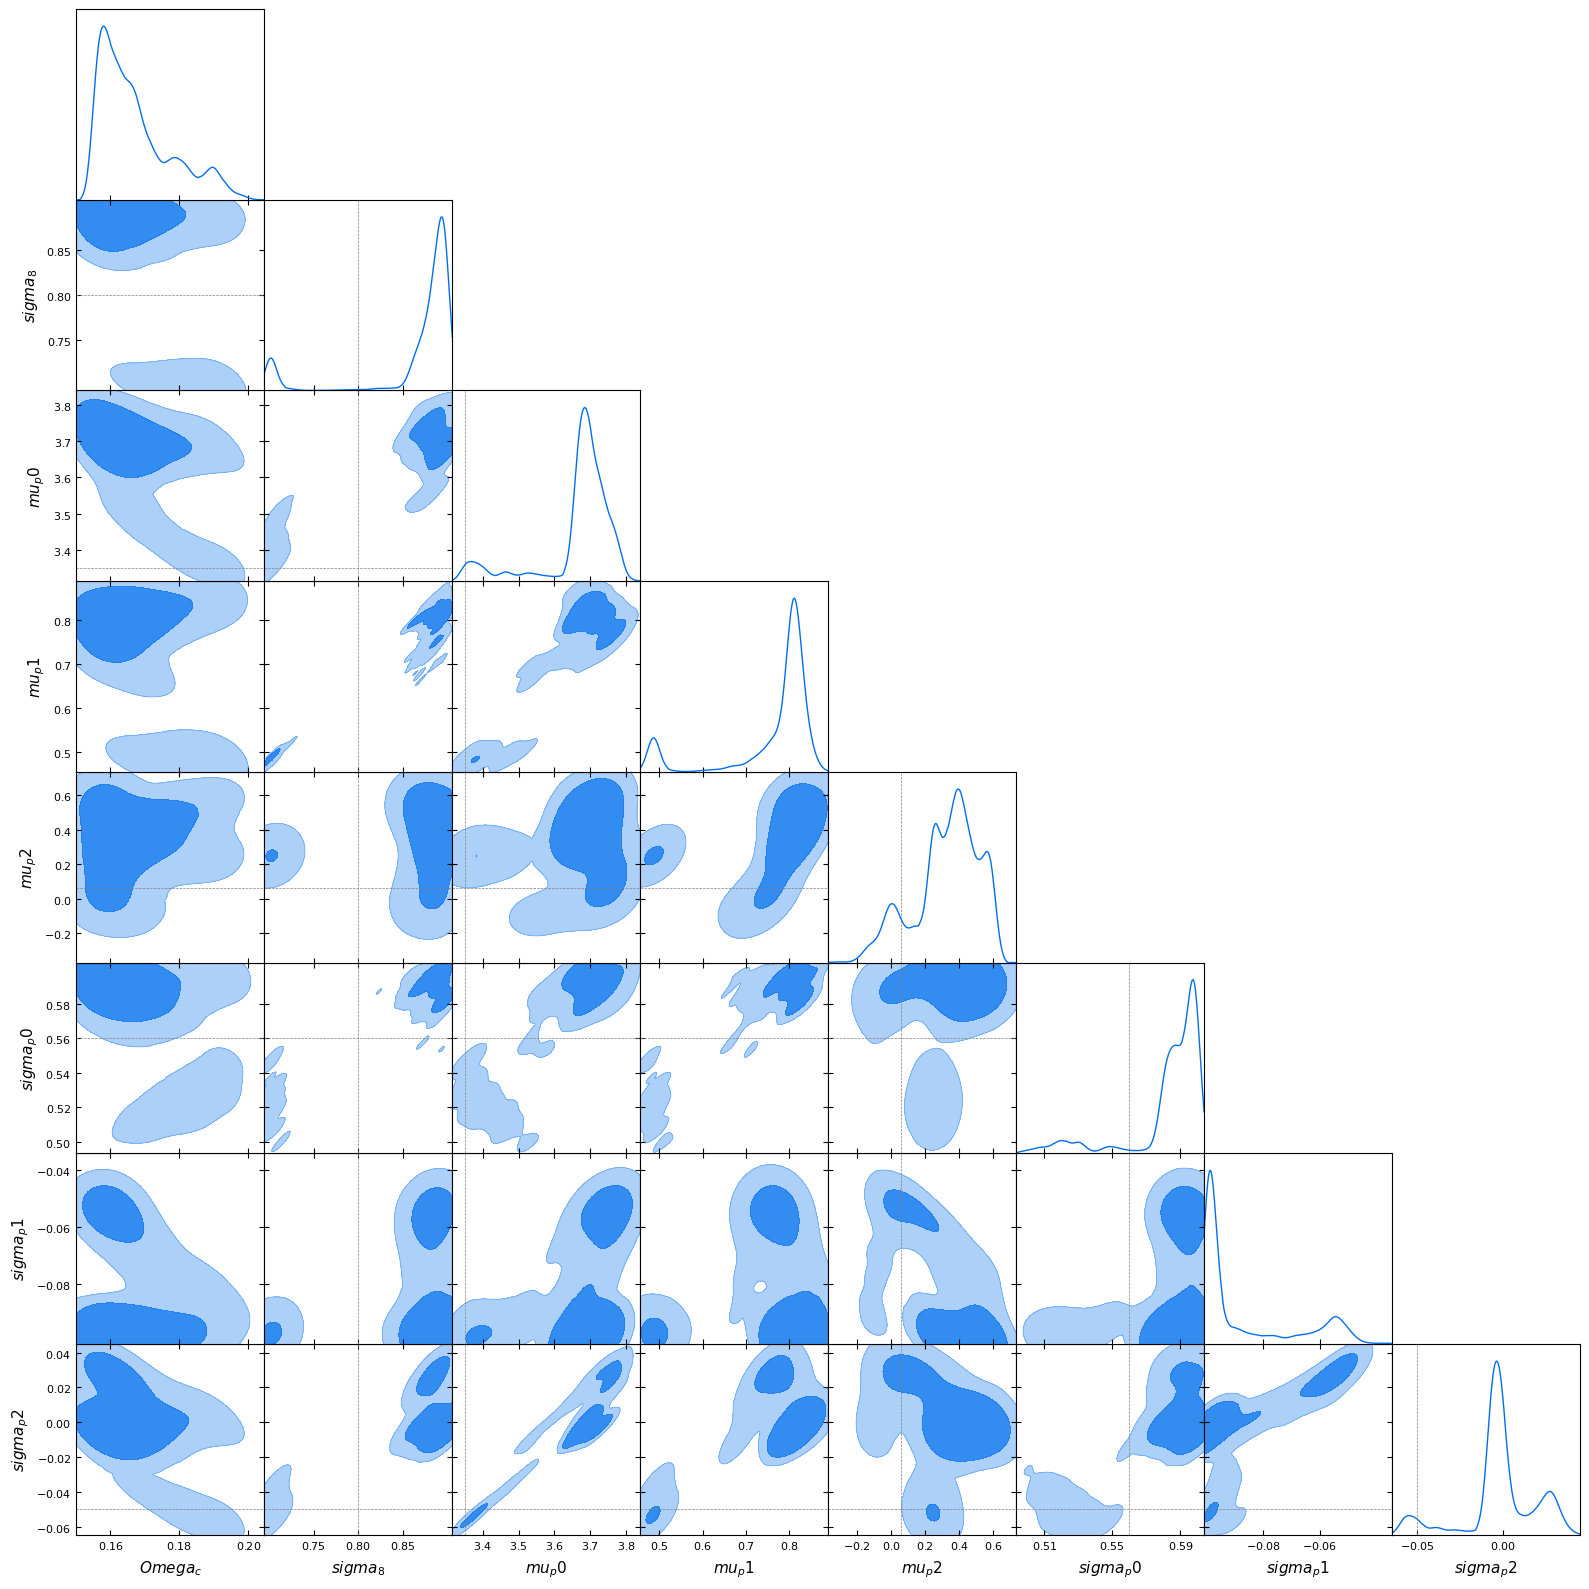

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt
Removed no burn in
1200


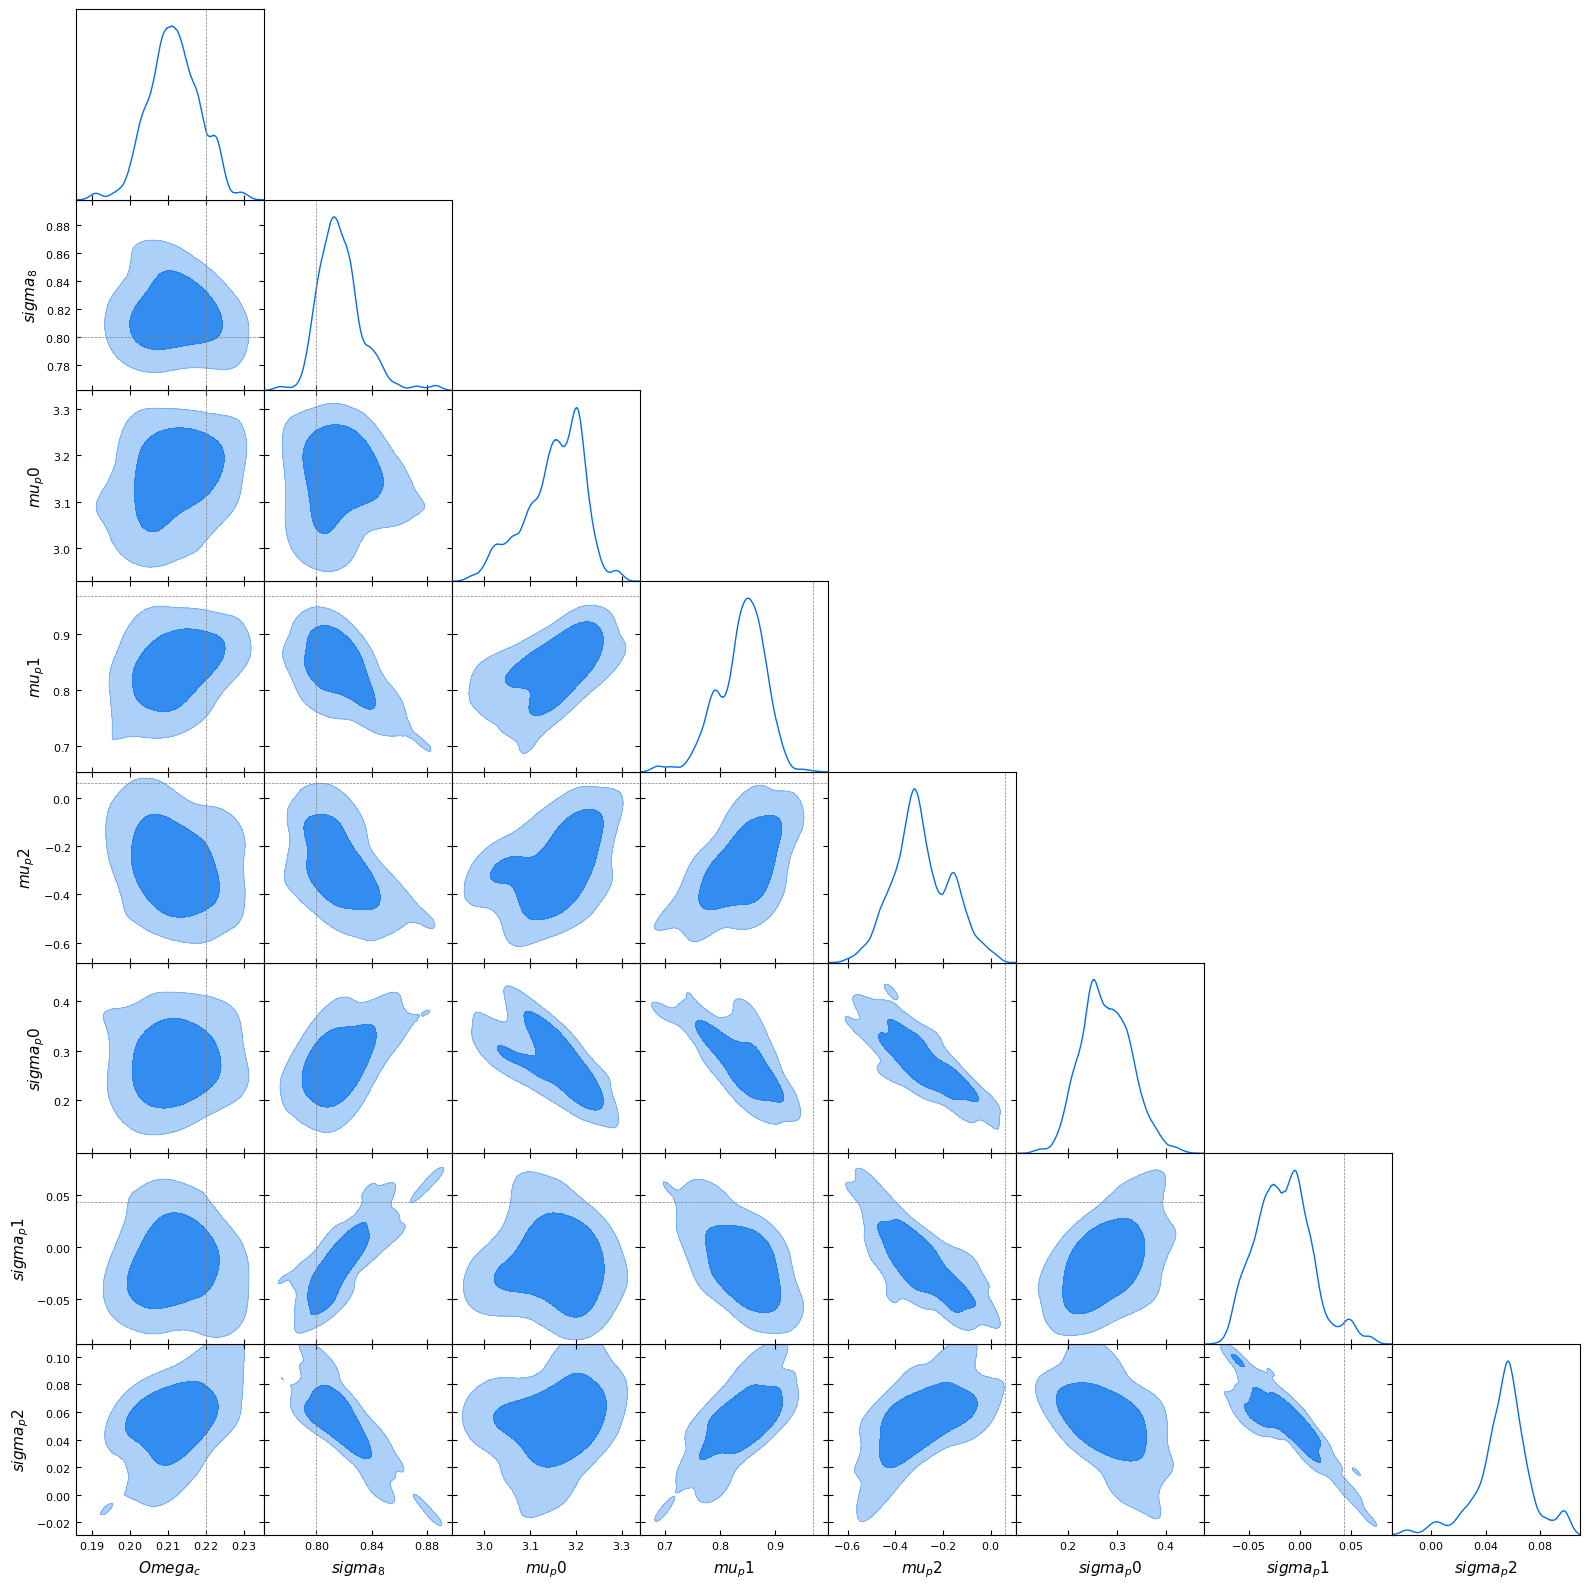

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.20519063729312978,
  0.7999161263408195,
  3.002630387761138,
  0.7986481364402394,
  -0.2999990124517145,
  0.3001334455101253,
  -0.029814935202786268,
  0.05959712773590086],
 [0.20537942129641626,
  0.7999788459900287,
  3.0009424981170483,
  0.7994470677551442,
  -0.29945478693654426,
  0.2999859399298285,
  -0.029770390026157834,
  0.060016466612843516],
 [0.2052783851976729,
  0.8000738180019571,
  2.999413457931956,
  0.8001097113393827,
  -0.30039955799886825,
  0.3004565622800193,
  -0.030002265871071757,
  0.06002962154821462],
 [0.20531933217415543,
  0.8001823916647801,
  3.000910165041082,
  0.7999963296813504,
  -0.30002917440337884,
  0.3010308023080607,
  -0.030225195790711867,
  0.05970831985531044],
 [0.2051731598656655,
  0.8002569824857868,
  2.9977323240102405,
  0.8009302461768709,
  -0.30239594686707383,
  0.2996786538472011,
  -0.029947768869215238,
  0.059033770588385694],
 [0.2055473478124853,
  0.7999300874774163,
  2.9997601137095793,
  0.79995882465742

In [15]:
###Change the home path to yours
home = '/pbs/home/e/ebarroso/'

generate_triangle_plot(home + "CLPipeline/examples/cosmoDC2-20deg2/outputs/output_rp_tjpc/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

###We do not have fiducial values for this one. The ones here are just for illustration
generate_triangle_plot(home + "CLPipeline/examples/wazp_cosmoDC2/outputs/output_rp_tjpc/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

###We do not have fiducial values for this one. The ones here are just for illustration
generate_triangle_plot(home + "CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])



LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso//CLPipeline/examples/wazp_DC2/outputs_20_richness/output_rp/number_counts_samples.txt
Removed no burn in
9900


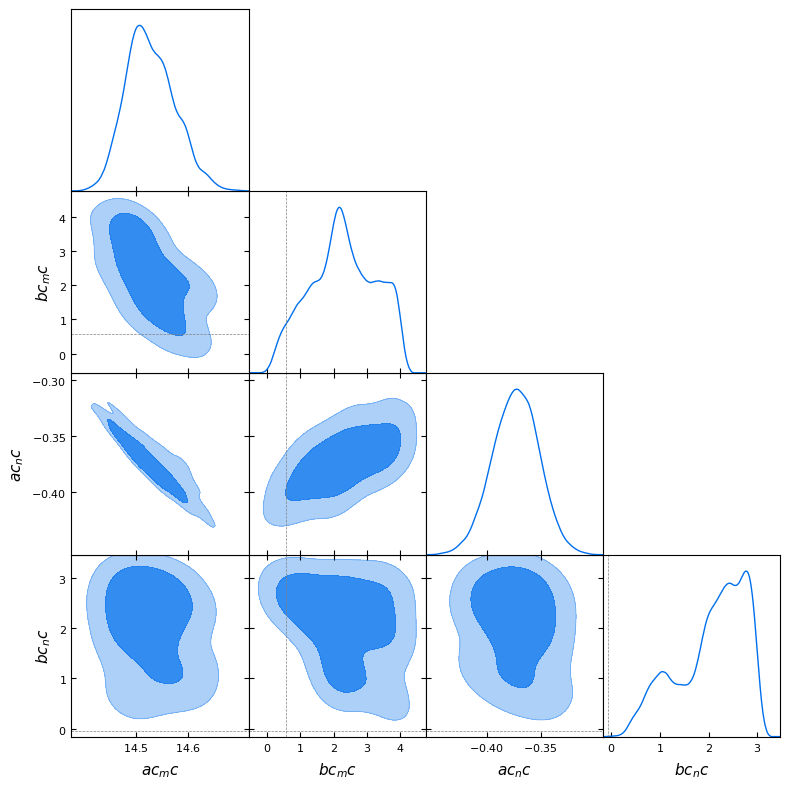

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
home = '/sps/lsst/users/ebarroso/'

data = generate_triangle_plot(home + "/CLPipeline/examples/wazp_DC2/outputs_20_richness/output_rp/number_counts_samples.txt", [
    ("ac_mc", 0.06),
    ("bc_mc", 0.56),
    ("ac_nc", 0.043),
    ("bc_nc", -0.05),
])


In [50]:
from firecrown.models.cluster.recipes.murata_binned_spec_z import MurataBinnedSpecZRecipe as MDS
from firecrown.models.cluster.abundance import ClusterAbundance
from firecrown.models.cluster.abundance import ClusterAbundance
from firecrown.models.cluster.properties import ClusterProperty
from firecrown.likelihood.binned_cluster_number_counts import BinnedClusterNumberCounts
from firecrown.models.cluster.mass_proxy import MurataBinned
import sacc
import pyccl as ccl
import numpy as np
from firecrown.modeling_tools import ModelingTools

In [51]:
def compare_prediction(path, survey_nm, pivot_mass, pivot_redshift, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2, mass_parameter=False):
    s_read = sacc.Sacc.load_fits(path)

    
    hmf = ccl.halos.MassFuncDespali16()
    min_mass, max_mass = 13., 16.
    min_z, max_z = 0.2, 0.8
    cluster_abundance = ClusterAbundance((min_mass, max_mass), (min_z, max_z), hmf)
    cosmo_ccl = ccl.Cosmology(
    Omega_c=0.2052,
    Omega_b=0.0448,
    h=0.71,
    n_s=0.963,
    sigma8=0.8,
    Omega_k=0.0,
    Neff=3.044,
    m_nu=0.0,
    w0=-1.0,
    wa=0.0,
    T_CMB=2.7255
    )
    cluster_abundance.update_ingredients(cosmo_ccl)
    
    modeling_tools = ModelingTools(cluster_abundance=cluster_abundance)
    mds = MDS()
    mds.mass_distribution.pivot_mass = np.log(10**pivot_mass)
    mds.mass_distribution.pivot_redshift = pivot_redshift
    mds.mass_distribution.log1p_pivot_redshift = np.log1p(pivot_redshift)
    mds.mass_distribution.mu_p0 = mu_p0
    mds.mass_distribution.mu_p1 = mu_p1
    mds.mass_distribution.mu_p2 = mu_p2
    mds.mass_distribution.sigma_p0 = sigma_p0
    mds.mass_distribution.sigma_p1 = sigma_p1
    mds.mass_distribution.sigma_p2 = sigma_p2
    print(mds.mass_distribution.pivot_mass, mds.mass_distribution.mu_p0, mds.mass_distribution.sigma_p1, mds.mass_distribution.log1p_pivot_redshift )
    average_on = ClusterProperty.COUNTS
    if mass_parameter:
        average_on |= ClusterProperty.MASS
    bin_cl_theory = BinnedClusterNumberCounts(average_on, survey_nm, mds)
    bin_cl_theory.read(s_read)
    cluster_abundance.update_ingredients(cosmo_ccl)

    prediction = bin_cl_theory._compute_theory_vector(modeling_tools)
    data = bin_cl_theory.data_vector
    print(prediction, data, np.array(prediction)/np.array(data))
    return prediction


In [54]:
sdss_sacc = "/pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/clusters_SDSS_sacc_file_cov.sacc"
sdss_survey_name = "SDSSCluster_redshift_richness"
mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2 = 3, 0.8, -0.3, 0.3, -0.03, 0.06#3.59 , 0.853 ,-0.12 ,0.39, -0.0715 ,0.0784
pivot_mass = 14.243956661092533#np.log10(np.exp(32.79792227308491))
pivot_redshift = 0.15
pred_sdss = compare_prediction(sdss_sacc, sdss_survey_name, pivot_mass, pivot_redshift, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2, mass_parameter=True)


32.79792227308491 3 -0.03 0.13976194237515868
[2.71755137e-01 2.92134758e-01 2.47938297e-01 1.15091559e-57
 5.80505367e-54 4.47018028e-62 1.60022884e-09 1.71274783e-09
 1.48315604e-09]
[3.45737415e-23 8.69444917e-22 7.68101779e-25 1.55763927e-05
 1.48276706e-05 1.64552706e-05]
[5.62663232e-46 4.39343343e-43 2.06294982e-49 1.99531597e-08
 2.06472860e-08 1.92045309e-08 6.38209888e-07 1.62493934e-06
 2.12415650e-07 3.14001864e-02 2.82967930e-02 3.52050222e-02]
[1.73100223e-54 5.22406622e-51 1.24858746e-58 3.04714221e-09
 3.23324600e-09 2.85171942e-09 1.25996695e-34 1.71670919e-32
 3.73882288e-37 3.80294289e-07 3.78715253e-07 3.82051347e-07
 1.17987140e-13 7.65811939e-13 1.30396381e-14 8.52441744e-04
 7.79702494e-04 9.41200683e-04 5.64288988e-03 8.17263344e-03
 3.63844137e-03 3.11628750e-01 2.92307669e-01 3.33111539e-01]
[7.45714468e-57 3.29736794e-53 3.39459115e-61 1.88131999e-09
 2.00921646e-09 1.74793968e-09 9.16650434e-51 1.52457312e-47
 1.35459016e-54 6.73261547e-09 7.06830106e-09 6.3

In [11]:
cosmodc2_20deg_sacc = "/pbs/home/e/ebarroso/CLPipeline/examples/cosmoDC2-20deg2/outputs/clusters_sacc_file_cov.sacc"
deg20_survey_name = 'cosmodc2-20deg2-CL'
mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2 = 3, 0.8, -0.3, 0.3, -0.03, 0.06#3.77, 0.867, -0.396, 0.540, -0.0742, 0.009
pivot_mass_dc2 = 14.5
pivot_redshift_dc2 = 0.6
pred_cosmodc2_20 = compare_prediction(cosmodc2_20deg_sacc, deg20_survey_name, pivot_mass_dc2, pivot_redshift_dc2, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2)



33.38748384841366 3 -0.03 0.4700036292457356
[119.04211446 200.79023756 228.25769319  35.03513286  52.18672436
  51.35066071   4.01458715   5.22598147   4.3876883    4.37727348
   5.03251659   3.6812158 ] [147. 376. 293.  37. 120.  83.   5.  14.   8.   7.  25.  15.] [0.8098103  0.53401659 0.7790365  0.94689548 0.43488937 0.61868266
 0.80291743 0.37328439 0.54846104 0.62532478 0.20130066 0.24541439]


In [55]:
cosmodc2_wazp_sacc = "/pbs/home/e/ebarroso/CLPipeline/examples/wazp_cosmoDC2/outputs/clusters_sacc_file_cov.sacc"
deg20_survey_name = 'cosmodc2-20deg2-CL'
mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2 = 3.375, 0.12958, 0.105, 0.13618, 0.03787, -0.01685#3.77, 0.867, -0.396, 0.540, -0.0742, 0.009
pivot_mass_dc2 = 14.5
pivot_redshift_dc2 = 0.6
pred_cosmodc2_20 = compare_prediction(cosmodc2_20deg_sacc, deg20_survey_name, pivot_mass_dc2, pivot_redshift_dc2, mu_p0, mu_p1, mu_p2, sigma_p0, sigma_p1, sigma_p2)



NameError: name 'cosmodc2_20deg_sacc' is not defined

In [18]:
1.0 * 10**14.5

316227766016837.94

In [14]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
        
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}

    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]   
    return data_so

LOADING CHAIN FROM FILE:  /sps/lsst/users/ebarroso//CLPipeline/examples/wazp_DC2/outputs/output_rp/number_counts_samples.txt


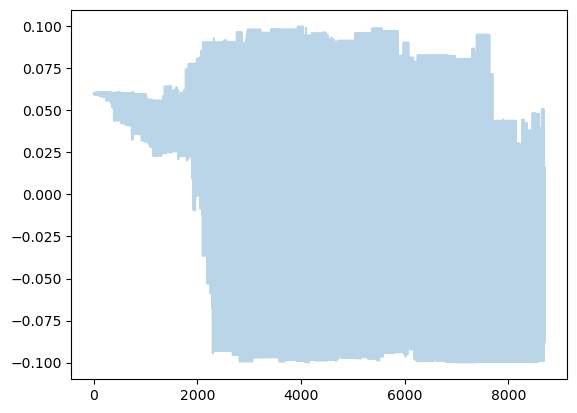

In [46]:
home = '/sps/lsst/users/ebarroso/'

data = generate_triangle_plot(home + "/CLPipeline/examples/wazp_DC2/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0", 3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05),
    ("ac_mc", 0.06),
    ("bc_mc", 0.56),
    ("ac_nc", 0.043),
    ("bc_nc", -0.05),
])
mass1 = []
for it in data:
    mass1.append(it[7])
plt.plot(np.linspace(0, len(mass1), len(mass1)), mass1, alpha=.3)

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt


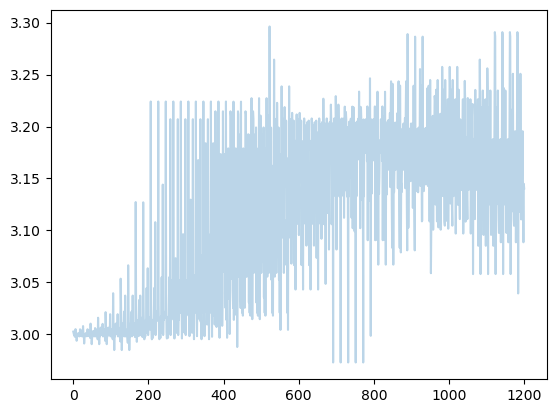

In [45]:
home = '/pbs/home/e/ebarroso/' 


data = generate_triangle_plot(home + "CLPipeline/examples/SDSS_data/outputs/output_rp/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0", 3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])
mass1 = []
for it in data:
    mass1.append(it[2])
plt.plot(np.linspace(0, len(mass1), len(mass1)), mass1, alpha=.3)